In [1]:
import numpy as np
from model_functions import *
from Classification_models_LOSO_2Class import *

### Logistic Regression

### SVM

In [61]:
val_acc_met = [0,0,0,0,0,0,0]
val_acc_metreg = [0,0,0,0,0,0,0]

for j in range(12,26,2):
        subject_data, freqs, targets = load_data(duration=120,overlap=60,seg_length=j)
    
        save_psds(subject_data,freqs,targets,'all_psds_very_long_j.pickle')
        subject_data, freqs, targets = load_psds('all_psds_very_long_j.pickle')
        
        test_labels = align_test_labels(classes=['A','C'])
        features, targets = remove_class(subject_data,targets,'F')
        features, targets = remove_test(features,targets,test_labels)
        
        rbps = [relative_band_power(features[i],freqs,freq_bands=[4.0,7.0,9.0,11.0,13.0,25.0]) 
                for i in range(len(features))]
        rbps = remove_channel(rbps, ['F3','F4', 'C4', 'F8', 'Pz'])
        
        train_metric_dict, val_metric_dict = svm_cross(rbps, targets,kernel='linear',
                                                reg_parameter=1)
        
        train_metric_dict_reg, val_metric_dict_reg = log_reg_cross(rbps, targets, PCA_components = 70, reg_parameter = 1)
        val_acc_met[j//2-6] = val_metric_dict['acc']
        val_acc_metreg[j//2-6] = val_metric_dict_reg['acc']
        print('validation metrics for seg length ',j,' are:',val_metric_dict, ' and for Regression ',val_metric_dict_reg)


validation metrics for seg length  12  are: {'acc': 0.7207977207977208, 'sens': 0.7493403693931399, 'spec': 0.6873065015479877, 'f1': 0.7434554973821988}  and for Regression  {'acc': 0.7264957264957265, 'sens': 0.7572559366754618, 'spec': 0.6904024767801857, 'f1': 0.7493472584856398}
validation metrics for seg length  14  are: {'acc': 0.7350427350427351, 'sens': 0.7757255936675461, 'spec': 0.6873065015479877, 'f1': 0.7596899224806201}  and for Regression  {'acc': 0.7350427350427351, 'sens': 0.7651715039577837, 'spec': 0.6996904024767802, 'f1': 0.7571801566579635}
validation metrics for seg length  16  are: {'acc': 0.7378917378917379, 'sens': 0.7783641160949868, 'spec': 0.6904024767801857, 'f1': 0.7622739018087855}  and for Regression  {'acc': 0.7564102564102564, 'sens': 0.7783641160949868, 'spec': 0.7306501547987616, 'f1': 0.7752956636005255}
validation metrics for seg length  18  are: {'acc': 0.7279202279202279, 'sens': 0.762532981530343, 'spec': 0.6873065015479877, 'f1': 0.7516254876

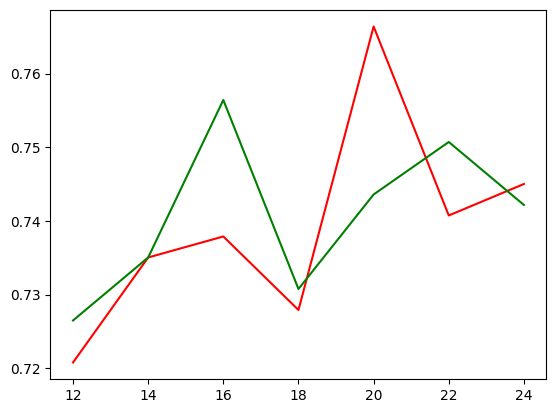

In [65]:
import matplotlib.pyplot as plt
x = [12,14,16,18,20,22,24]
plt.plot(x,val_acc_met,c = 'red')
plt.plot(x,val_acc_metreg,c = 'green')
plt.show()